# Churn Prediction Project

Churn prediction is the process of identifying customers who are likely to leave a business or stop using its products or services. It is an essential part of customer retention management and is used in various industries, including telecommunications, banking, e-commerce, and subscription-based services.

Churn prediction is essential because customer acquisition is expensive, and losing a customer can significantly impact a business's revenue and growth. Therefore, it is crucial for businesses to identify customers who are at risk of churning and take appropriate measures to retain them.

### Extract, Transform and Load (ETL)

Extract, transform, and load (ETL) is a critical process in data science that involves extracting data from various sources, transforming it into a suitable format, and loading it into a target database or data warehouse. ETL is a crucial process in data science, enabling data scientists to integrate, clean, transform, and load data efficiently and accurately. It improves data quality, scalability, automation, and data security, making it an essential component of any data science project.

In [1]:
#importing pandas and numpy to deal with dataframe
import pandas as pd
import numpy as np

In [2]:
#Creating string variable to store local path of data
path = "/Users/ashpreetsingh/Downloads/Churn_Modelling.csv"

In [3]:
#Creating a dataframe df and reading the file using pandas csv function and using the first column as index
df = pd.read_csv(path,index_col=0)

In [4]:
#Using .head() we can obtain the first 5 rows of the dataset
df.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
RowNumber                                                                     
1            15634602  Hargrave          619    France  Female   42       2   
2            15647311      Hill          608     Spain  Female   41       1   
3            15619304      Onio          502    France  Female   42       8   
4            15701354      Boni          699    France  Female   39       1   
5            15737888  Mitchell          850     Spain  Female   43       2   

             Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber                                                        
1               0.00              1          1               1   
2           83807.86              1          0               1   
3          159660.80              3          1               0   
4               0.00              2          0               0   
5          125510.82              1          1               1   

           EstimatedSalary  Exited  
RowNumber                           
1                101348.88       1  
2                112542.58       0  
3                113931.57       1  
4                 93826.63       0  
5                 79084.10       0

## Exploratory Data Analysis (EDA)

EDA is a crucial process in data science that helps identify data quality issues, understand data distribution, discover relationships and patterns, validate assumptions, select relevant variables, communicate insights, and optimize performance. EDA provides a foundation for subsequent analysis and modeling, and informs decision-making.

In [5]:
#Using pandas info function to get more details about the columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
#Describe function helps us to analyse the Statical information in each column
df.describe()

CustomerId   CreditScore           Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count   10000.000000  10000.00000    10000.000000     10000.000000   
mean        1.530200      0.70550        0.515100    100090.239881   
std         0.581654      0.45584        0.499797     57510.492818   
min         1.000000      0.00000        0.000000        11.580000   
25%         1.000000      0.00000        0.000000     51002.110000   
50%         1.000000      1.00000        1.000000    100193.915000   
75%         2.000000      1.00000        1.000000    149388.247500   
max         4.000000      1.00000        1.000000    199992.480000   

             Exited  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [7]:
# importing other visualisation libraries for analysis 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='RowNumber'>

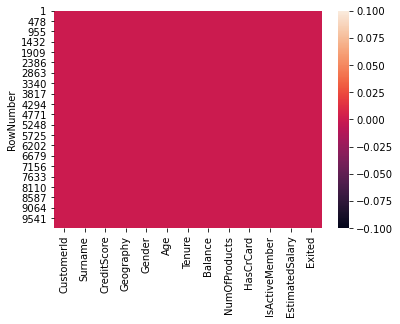

In [8]:
#Checking NULL values in dataset
sns.heatmap(df.isna())

from the above heatmap we can infer that there are no null values present inside the dataset

In [9]:
#creating a new column to convert gender into binary format
df['Male'] = pd.get_dummies(df['Gender'])['Male']

In [10]:
#dropping the previous Gender column
df.drop('Gender',axis=1,inplace=True)

<AxesSubplot:xlabel='Male', ylabel='count'>

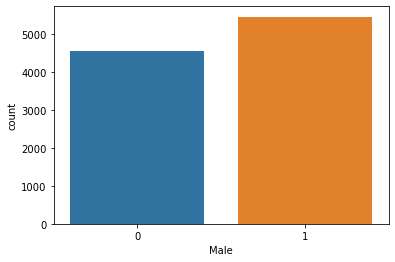

In [11]:
#Countplot to check number of males and females in dataset. Here 0 represents Female and 1 respresnts the Males
sns.countplot(x=df['Male'])

the above plot shows that there is a slight more count of males in respect to that of females

<AxesSubplot:xlabel='Exited', ylabel='Male'>

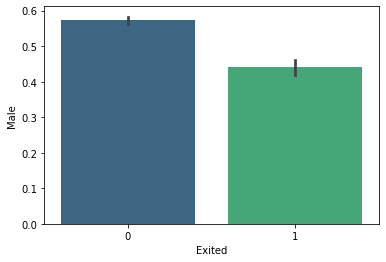

In [12]:
#bar graph representing people who left the bank and gender
sns.barplot(x=df['Exited'],y=df['Male'],palette='viridis')

The above graph shows that females have a more probability of exiting 

<AxesSubplot:xlabel='Geography', ylabel='Tenure'>

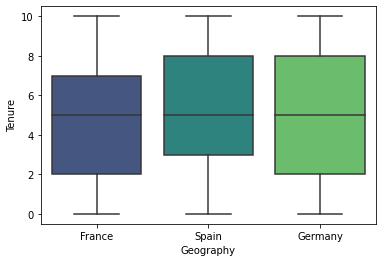

In [13]:
#Box plot for gender age visualisation 
sns.boxplot(x=df['Geography'],y=df['Tenure'],palette='viridis')

Here we can infer that Spanish people has a higher tenure in comparison to other groups. 

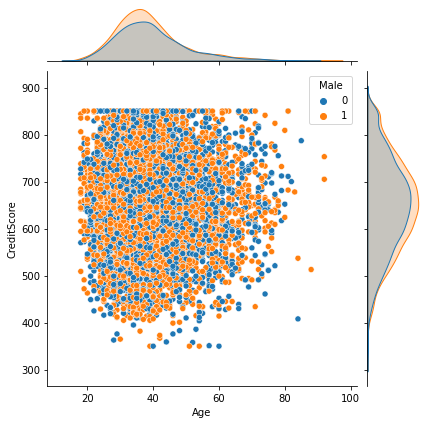

In [14]:
#Joint plot between Age vs Credit Score
sns.jointplot(x='Age',y='CreditScore',data=df,hue='Male')

With reference to the above plot we can check for the outliers in the dataset

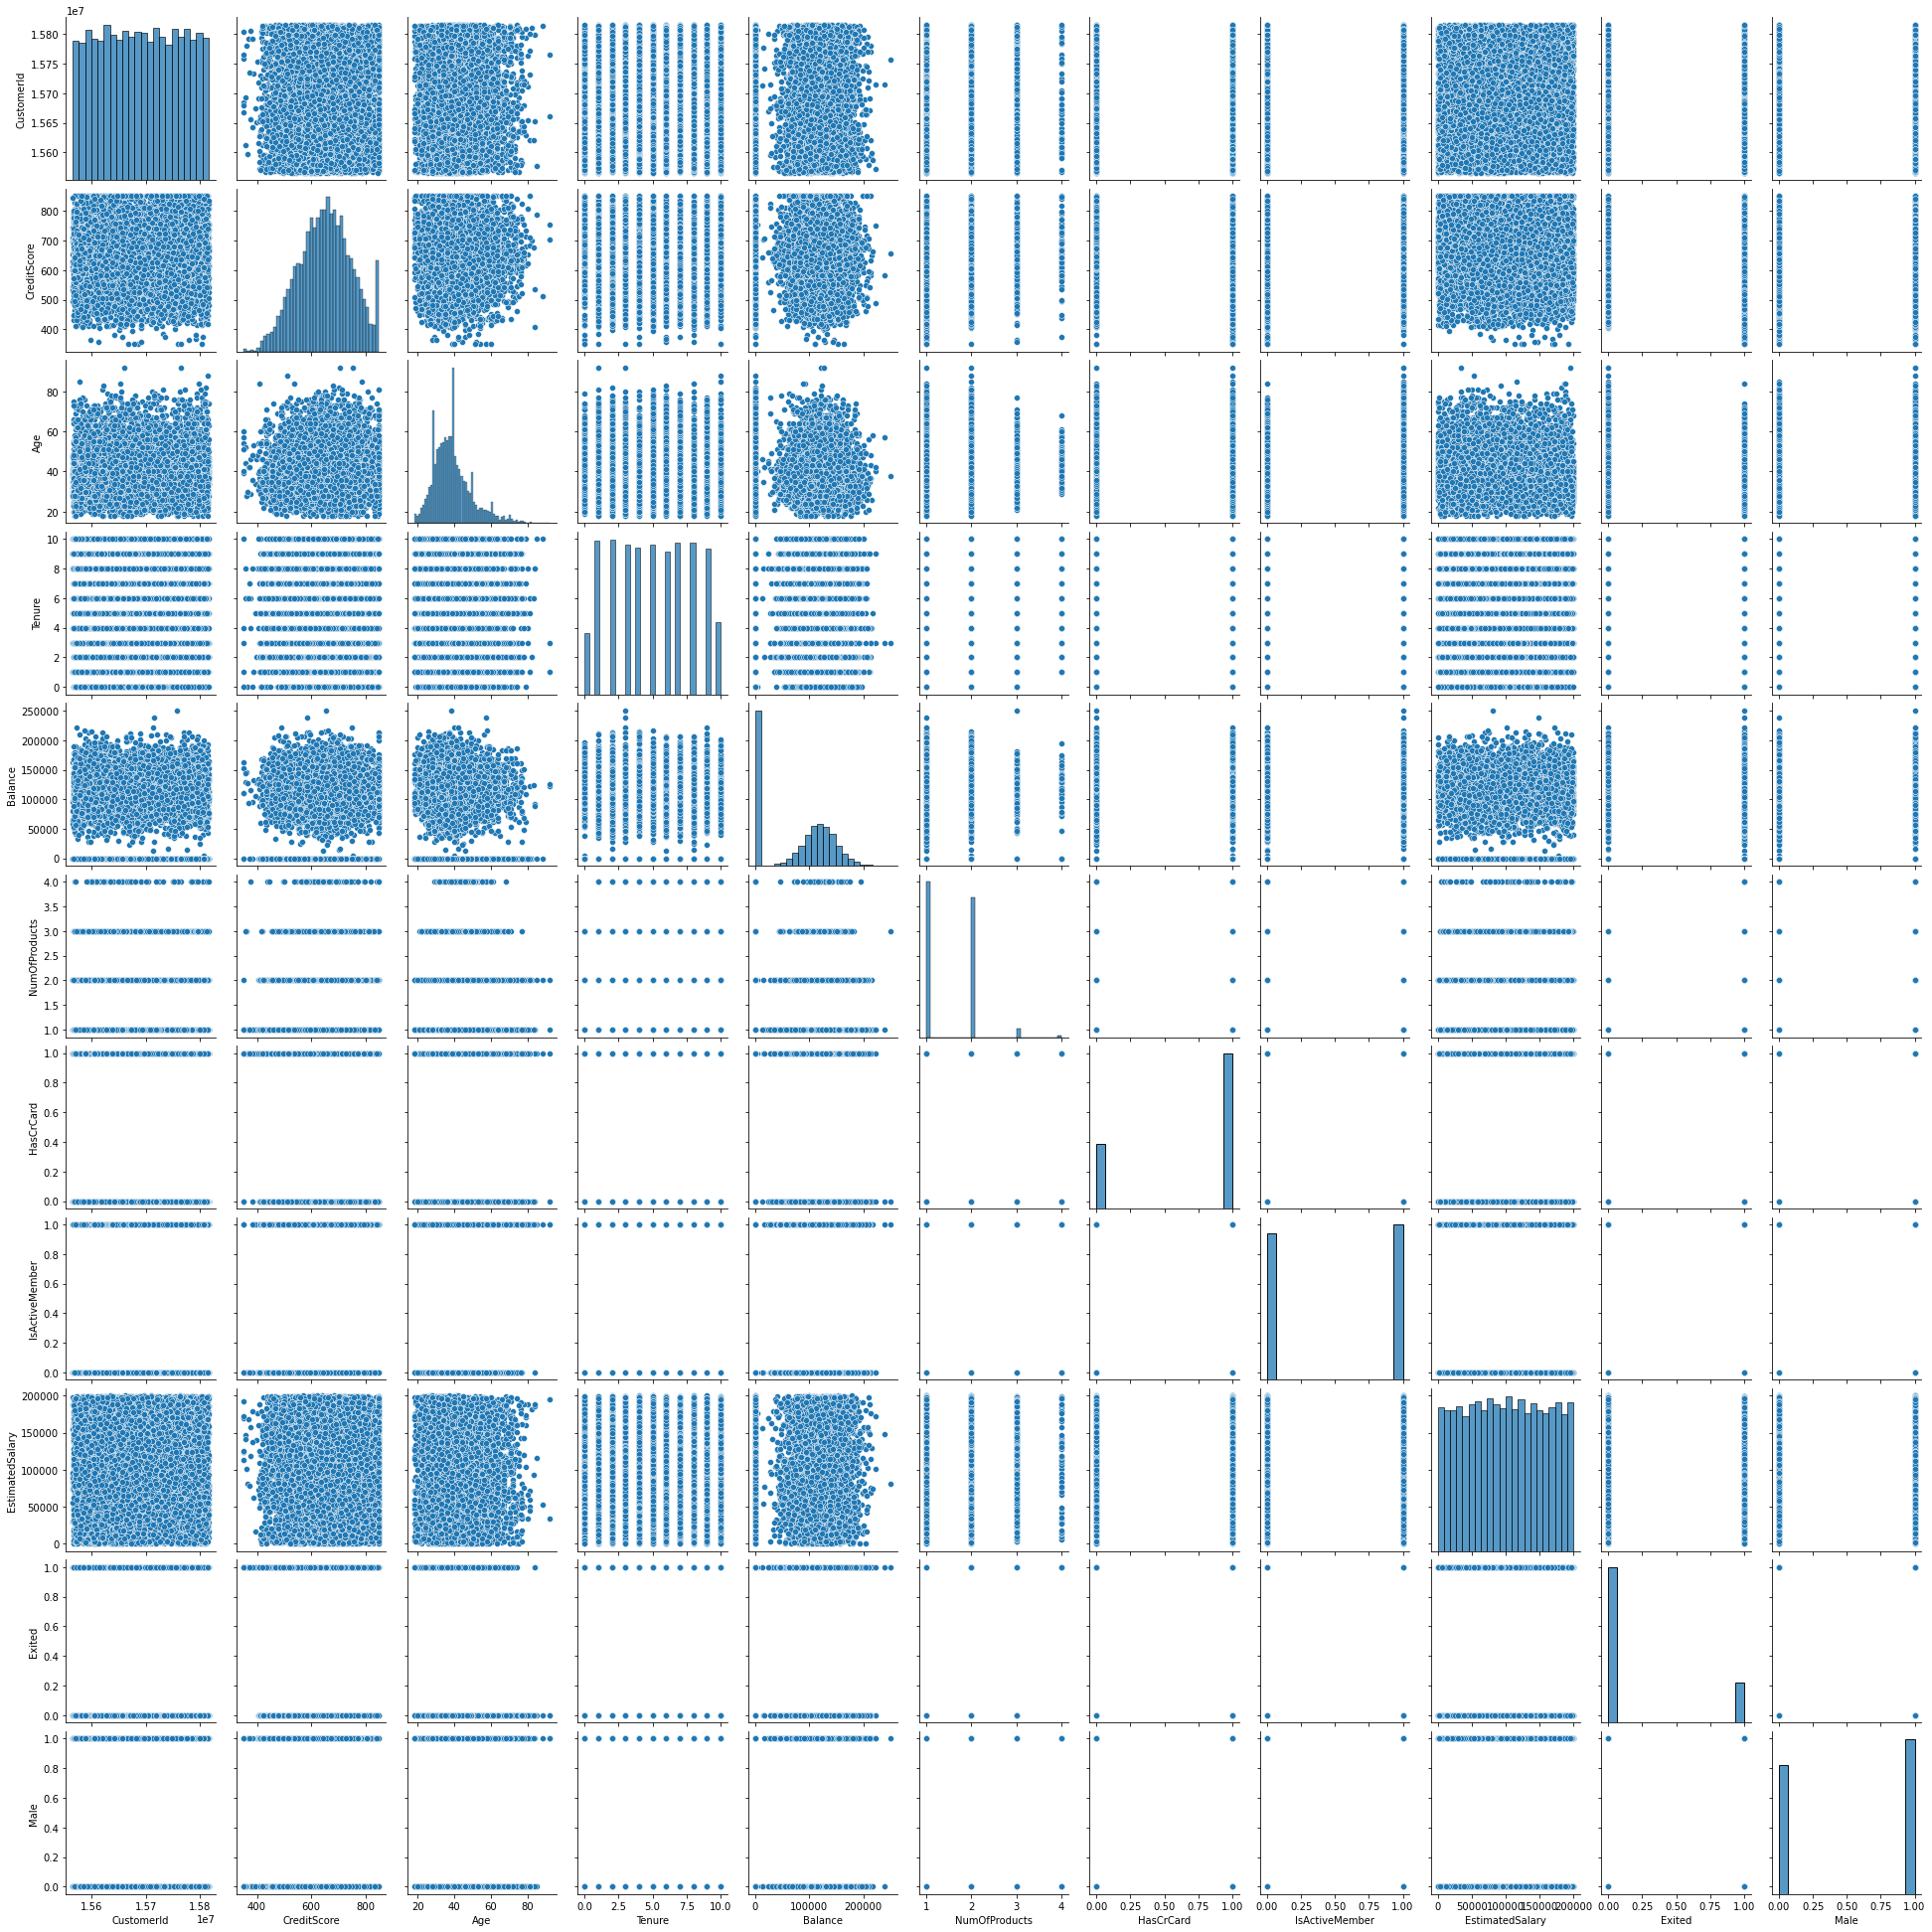

In [15]:
#generation of pairplot 
sns.pairplot(df)

<AxesSubplot:>

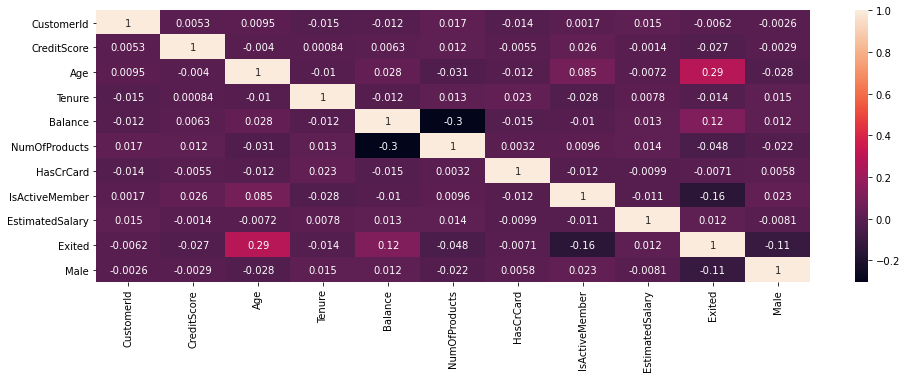

In [16]:
#heatmap representing the correlation between categories
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(),annot=True)

The above heatmap may help us to find the correlation between different fields of data. We can say that age. is the most correlated column with respect to the exited column

<AxesSubplot:xlabel='Age', ylabel='Count'>

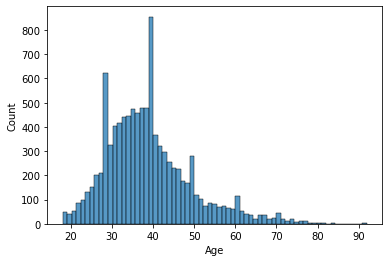

In [17]:
#plotting a histogram to check the age groups of customers
sns.histplot(x=df['Age'])

The highest number of customers lie in the 25 to 50 age bracket

In [18]:
from ydata_profiling import ProfileReport

In [19]:
profile = ProfileReport(df, title="Profiling Report")

In [20]:
profile

Conclusions from the above report -> 
- There are zero missing cells, means means all rows are filled.
- The customerId field contains all unique values. In case of credit score the minimum credit scroe is 350, and maximum is 850, while the mean value stand at 650. 
- Most of the people in the data set are located in France, Germany on next.
- The data set contains minimum age as 18 and maximum age 92. 
- Most of the people have a zero balance that is around 36% of the total rows.
- Most of people took only one product or two products while only a few people had three or four number of services. 

<AxesSubplot:xlabel='Geography', ylabel='count'>

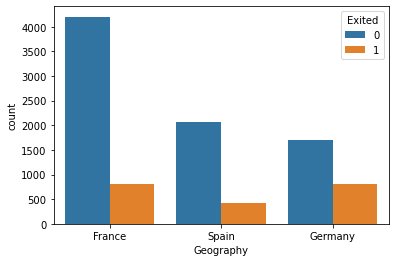

In [21]:
sns.countplot(x=df['Geography'],hue=df['Exited'])

Germany has a higher exit rate with less population, France has the highest non-exited population

# Machine Learning

Supervised and unsupervised machine learning are two main categories of machine learning algorithms. Supervised learning deals with labeled data, where the algorithm learns from a dataset where the output variable is known for each input instance. The goal is to predict the output variable for new, unseen data. Classification and regression are examples of supervised learning tasks.

Unsupervised learning, on the other hand, deals with unlabeled data, where the algorithm tries to discover patterns or structure in the data without any prior knowledge of the output variable. Clustering and dimensionality reduction are examples of unsupervised learning tasks.

In [22]:
df.drop(df[['Surname','CustomerId']],axis=1,inplace=True)

The above two columns are not required for training the model so we can remove them

In [23]:
df.head()

CreditScore Geography  Age  Tenure    Balance  NumOfProducts  \
RowNumber                                                                 
1                  619    France   42       2       0.00              1   
2                  608     Spain   41       1   83807.86              1   
3                  502    France   42       8  159660.80              3   
4                  699    France   39       1       0.00              2   
5                  850     Spain   43       2  125510.82              1   

           HasCrCard  IsActiveMember  EstimatedSalary  Exited  Male  
RowNumber                                                            
1                  1               1        101348.88       1     0  
2                  0               1        112542.58       0     0  
3                  1               0        113931.57       1     0  
4                  0               0         93826.63       0     0  
5                  1               1         79084.10       0     0

### Need of binary classification?
- Binary classification is commonly used in churn prediction because the goal of churn prediction is to predict whether a customer is likely to churn or not, which is a binary outcome. In other words, the output variable (i.e., the target variable) in a churn prediction problem is a binary variable that takes on one of two possible values: churn or no churn.


- By using binary classification algorithms, we can train a model to predict the probability of a customer churning based on their historical behavior and other relevant factors. This can help businesses identify customers who are most at risk of churning and take proactive measures to retain them. For example, a company might offer a special promotion or discount to customers who are predicted to be at high risk of churning.


- Binary categorization models are frequently simple to understand and can offer useful information for businesses. They can also be utilised to better allocate resources and order activities aimed at retaining customers. Binary classification models can also be used to create predictions in real-time and can be trained on a lot of data, which is useful for many firms that need to respond rapidly to client behaviour.

Overall, binary classification is an efficient method for predicting customer churn since it offers a quick and easy approach to determine whether a client is likely to leave or stay based on past behaviour and other important variables.

In [24]:
def country(cname):
    if cname =='France':
        return 1
    elif cname =='Germany':
        return 2
    elif cname =='Spain':
        return 3

In [25]:
df['Country_val'] = df['Geography'].apply(country)

In [26]:
df.drop('Geography',axis=1,inplace=True)

using the above custom function named country we can use values in place of the country names which will help us to train the machine learning model

## Scaling

Scaling helps to prevent certain features from having undue influence on the model's predictions due to their larger scales. It can improve the convergence rate of certain optimization algorithms used in model training.Scaling can improve the accuracy and consistency of certain models, such as distance-based algorithms like k-nearest neighbors. It can make it easier to compare and interpret the importance of different features in a model.Scaling can help to reduce the impact of outliers on the model's performance.

In [27]:
from sklearn.preprocessing import MinMaxScaler
# Select the column to be normalized
column_to_normalize = 'Age'

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the column
df[column_to_normalize] = scaler.fit_transform(df[[column_to_normalize]])

In [28]:
column_to_normalize = 'Balance'

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the column
df[column_to_normalize] = scaler.fit_transform(df[[column_to_normalize]])

In [29]:
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Male', 'Country_val']]
y = df['Exited']

dividing the dataframe into input features (X) and target variable (y) ['Exited']  is an essential step in machine learning because it allows us to separate the features that are used to make predictions from the target variable that is being predicted. It also allows us to manipulate the data more easily and evaluate the model's ability to generalize to new, unseen data.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)

we now split the dataset into a training set and a testing set. We use the training set to train the model and the testing set to evaluate its performance. By doing this, we can get a more realistic estimate of the model's performance.

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr = LogisticRegression()
#creating object 

In [34]:
lr.fit(X_train,y_train)

LogisticRegression()

the "fit" method estimates the coefficients of the logistic regression equation using an optimization algorithm.

In [35]:
predicted_values = lr.predict(X_test)
#storing the predicted values

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
# generating a confusion matrix
cm = confusion_matrix(y_test,predicted_values)

In [38]:
print("True Positives(TPs): " ,cm[0][0])
print("False Positives (FPs): ", cm[0][1])
print("False Negatives (FNs)): ", cm[1][0])
print("True Negatives (TNS)): ", cm[1][1])


True Positives(TPs):  3190
False Positives (FPs):  0
False Negatives (FNs)):  810
True Negatives (TNS)):  0


In [75]:
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3190
           1       0.00      0.00      0.00       810

    accuracy                           0.80      4000
   macro avg       0.40      0.50      0.44      4000
weighted avg       0.64      0.80      0.71      4000



Precision: It measures the accuracy of positive predictions made by the model. It is calculated as the ratio of true positives to the sum of true positives and false positives.

Recall: It measures the proportion of actual positive instances that were correctly identified by the model. It is calculated as the ratio of true positives to the sum of true positives and false negatives.

F1 score: It is the harmonic mean of precision and recall. It is calculated as 2*(precision*recall)/(precision+recall)

In [40]:
#finding the score of the model
lr.score(X_test,y_test)

0.7975

In [41]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test,predicted_values)

Mean squared error (MSE) is a common evaluation metric used in regression problems to measure the average squared difference between the predicted and true values. 

In [42]:
print(mse1)

0.2025


### SVM

The SVM algorithm works by finding the hyperplane that best separates the two classes of data in the dataset. The hyperplane is the decision boundary between the two classes, and the goal is to maximize the margin between the hyperplane and the closest data points of each class.

In [43]:
from sklearn.svm import SVC

In [44]:
#creating object 
svc = SVC()

In [45]:
#fitting the data
svc.fit(X_train,y_train)

SVC()

In [46]:
#predicting and storing the values in svpred
svpred = svc.predict(X_test)

In [47]:
#generation of confusion matrix
cm2 = confusion_matrix(y_test,svpred)

In [48]:
print("True Positives(TPs): " ,cm2[0][0])
print("False Positives (FPs): ", cm2[0][1])
print("False Negatives (FNs)): ", cm2[1][0])
print("True Negatives (TNS)): ", cm2[1][1])

True Positives(TPs):  3190
False Positives (FPs):  0
False Negatives (FNs)):  810
True Negatives (TNS)):  0


In [74]:
print(classification_report(y_test,svpred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3190
           1       0.00      0.00      0.00       810

    accuracy                           0.80      4000
   macro avg       0.40      0.50      0.44      4000
weighted avg       0.64      0.80      0.71      4000



Precision: It measures the accuracy of positive predictions made by the model. It is calculated as the ratio of true positives to the sum of true positives and false positives.

Recall: It measures the proportion of actual positive instances that were correctly identified by the model. It is calculated as the ratio of true positives to the sum of true positives and false negatives.

F1 score: It is the harmonic mean of precision and recall. It is calculated as 2*(precision*recall)/(precision+recall)

In [50]:
#finding the score of the model
svc.score(X_test,y_test)

0.7975

## Decision Tree

A decision tree consists of nodes, branches, and leaves. The nodes represent the questions or tests, the branches represent the possible answers, and the leaves represent the final decision or outcome. The process starts at the root node, which represents the initial question, and progresses through the tree until a final decision is made.

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dtc = DecisionTreeClassifier()

In [53]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
dtpred = dtc.predict(X_test)

In [55]:
print(classification_report(y_test,dtpred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      3190
           1       0.49      0.51      0.50       810

    accuracy                           0.79      4000
   macro avg       0.68      0.69      0.68      4000
weighted avg       0.80      0.79      0.80      4000



In [56]:
print(confusion_matrix(y_test,dtpred))

[[2764  426]
 [ 399  411]]


In [57]:
dtc.score(X_test,y_test)

0.79375

## Random Forest 

Random forest is a popular machine learning algorithm that is used for classification, regression, and other tasks. It is an ensemble method that combines multiple decision trees to make more accurate predictions.

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
#creating object
rfc = RandomForestClassifier()

In [60]:
#fitting the data
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [61]:
#storing the predicted values
rpred = rfc.predict(X_test)

In [62]:
print(classification_report(y_test,rpred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      3190
           1       0.77      0.44      0.56       810

    accuracy                           0.86      4000
   macro avg       0.82      0.71      0.74      4000
weighted avg       0.85      0.86      0.85      4000



In [63]:
print(confusion_matrix(y_test,rpred))

[[3083  107]
 [ 450  360]]


In [64]:
#finding the score
rfc.score(X_test,y_test)

0.86075

## API Implementation 

In [65]:
import pickle

In [66]:
with open('Churnpickle','wb') as f:
    pickle.dump(rfc,f)

In [67]:
with open('Churnpickle','rb') as f:
    mp = pickle.load(f)

In [68]:
mp.predict([[-0.32622142,  0.29351742, -1.04175968, -1.22584767, -0.91158349,
            0.64609167,  0.97024255,  0.02188649, -1.09598752, -0.90188624]])

array([1])

In [ ]:
!uvicorn newtemp:app --reload

INFO:     Will watch for changes in these directories: ['/Users/ashpreetsingh']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [2535] using StatReload
INFO:     Started server process [2537]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
